# Exercise 1b: Label-based indexing

## Aim: Learn how to index data arrays

Find the teaching resources here: https://tutorial.xarray.dev/fundamentals/02.1_indexing_Basic.html.

### Issues Covered: 
- Indexing, using `.loc()`, `.isel()` and `.sel()`

Q1. Open the `'../data/xbhubo.pgc0apr.nc'` dataset and load it into an xarray `Dataset` called `ds`.
(Hint: Don't forget to import any packages you need).
This file is a model run for HadCM3 run as part of the RAPID study: https://catalogue.ceda.ac.uk/uuid/6bbab8394124b252f8b1b036f9eb6b6b/

In [1]:
import xarray as xr
ds=xr.open_dataset('../data/xbhubo.pgc0apr.nc')

Q2. Select a subset of the `temperature` array using label-based indexing to get data at the position [0,0,0].

In [8]:
temperature= ds["temp"]
temperature.dims

('t', 'depth', 'latitude', 'longitude')

In [9]:
temperature[0,0,0,0]

<xarray.DataArray 'temp' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    longitude  float32 4B 0.0
    latitude   float32 4B -89.38
    depth      float32 4B 5.0
    t          object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

Q3. Use `.loc` to find the temperature 5 meters below the sea surface in the South Atlantic where latitiude is -50.625 and longitude is 0.

In [13]:
temperature.loc[:,5,-50.625,0]

<xarray.DataArray 'temp' (t: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
    longitude  float32 4B 0.0
    latitude   float32 4B -50.62
    depth      float32 4B 5.0
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

Q4. It's not ideal to have to keep track of which dimension is in which position. Instead, use `.isel` to use the dimension names to get the data in the same place: this is depth position 0, latitude position 31 and longitude position 0.

In [21]:
temperature.isel(depth=0, latitude=31, longitude=0)

<xarray.DataArray 'temp' (t: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
    longitude  float32 4B 0.0
    latitude   float32 4B -50.62
    depth      float32 4B 5.0
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

Q5. The previous method is still referring to a selection by integer position. Use `.sel` to give a labelled index with the named dimension to find the data at `lat=-78.5`, `lon=11.0`. You will need to pick a `method` too to select data with an inexact parameter.

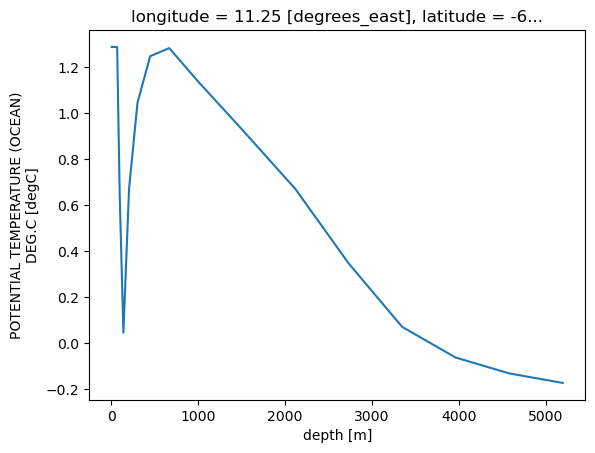

In [37]:
temperature.sel(latitude=-61.5, longitude= 11.0, method="nearest").plot()

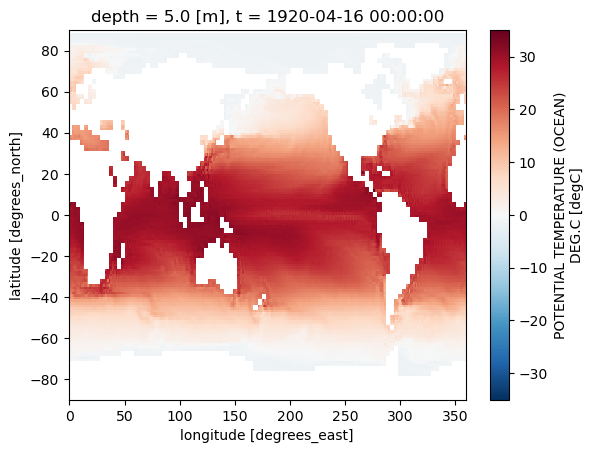

In [35]:
temperature.sel(depth=0, method='nearest').plot()